In [12]:
import pandas as pd
import matplotlib.pyplot as plt

1. Os dados a seguir representam o número de apólices de seguro que um corretor conseguiu vender em cada um de seus 20 primeiros dias em um emprego novo: 2, 4, 6, 3, 2, 1, 4, 3, 5, 2, 1, 1, 4, 0, 2, 2, 5, 2, 2, 1. Analise a assimetria da distribuição, utilizando os coeficientes de Pearson e de Bowley

In [34]:
q1 = pd.Series([2, 4, 6, 3, 2, 1, 4, 3, 5, 2, 1, 1, 4, 0, 2, 2, 5, 2, 2, 1])
quantiles1 = q1.quantile([.25, .5, .75])

bowley = ((quantiles1[0.75] - quantiles1[0.5]) - (quantiles1[0.5] - quantiles1[0.25])) 
bowley = bowley / ((quantiles1[0.75] - quantiles1[0.5]) + (quantiles1[0.5] - quantiles1[0.25])) 
bowley

# a assimentria está mais à direita, ou seja, q1 está mais proximo de q2

0.7777777777777778

{'whiskers': [<matplotlib.lines.Line2D at 0x2227d2f8898>,
 'caps': [<matplotlib.lines.Line2D at 0x2227d641198>,
 'boxes': [<matplotlib.lines.Line2D at 0x2227d2f8748>],
 'medians': [<matplotlib.lines.Line2D at 0x2227d6419e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2227d641e10>],
 'means': []}

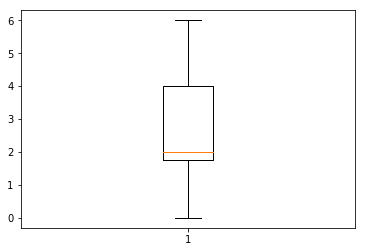

In [32]:
plt.boxplot(q1)

2. O professor Celso tem duas opções de caminho para se dirigir da sua casa até seu local de trabalho. Tentando definir qual o melhor caminho, ele anota o tempo de viagem em diferentes dias, obtendo os seguintes tempos (em minutos):
    
        Caminho 1: 12 11 10 10 8 12 15 7 20 12
        Caminho 2: 12 15 13 13 14 13 12 14 13 15

    Faça uma análise comparativa desses dados para ajudar o professor Celso a escolher um caminho.

In [3]:
q2 = pd.DataFrame({
    'Caminho 1': [12, 11, 10, 10, 8, 12, 15, 7, 20, 12],
    'Caminho 2': [12, 15, 13, 13, 14, 13, 12, 14, 13, 15]})

q2.describe()

,Caminho 1,Caminho 2
count,10.000000,10.000000
mean,11.700000,13.400000
std,3.683296,1.074968
min,7.000000,12.000000
25%,10.000000,13.000000
50%,11.500000,13.000000
75%,12.000000,14.000000
max,20.000000,15.000000


    O melhor caminho é o caminho 2, apesar dele ter uma media maior, ele tem um desvio padrão menor, ou seja, ele tende a um valor constante, é mais previsivel, comparado ao caminho 1

3. Em sua polpítica de fidelização de clientes, determinado supermercado tem uma promoção de dar descontos especiais diferenciados no mês do aniversário do cliente. O desconto básico é de 5%, mas clientes especiais – aqueles com pontuação alta – podem receber prêmios adicionais, que variam a cada mês e de filial para filial. A seguir você tem os pontos dos clientes aniversariantes de determinado mês em uma das filiais do supermercado.

                77 69 72 73 71 75 75 74 71 72 74 73 75 71 74
                73 78 77 74 75 69 76 76 80 74 85 74 73 72 74

    a) Construa o gráfico ramo-e-folhas e comente suas principais características.
    
    b) Calcule a mediana e o intervalo interquartil IQ.
    
    c) Construa o boxplot e comente suas principais características.
    
    d) Essa filial dá uma garrafa de champagne para seus clientes especiais, segundo a seguinte regra: a cada mês, os clientes com pontuação acima do terceiro quartil por 1,5 vezes o intervalo interquartil serão premiados. Algum cliente ganhará a garrafa de champagne nesse mês?

In [4]:
q3 = pd.Series([
    77, 69, 72, 73, 71, 75, 75, 74, 71, 72, 74, 73, 75, 71, 74, 
    73, 78, 77, 74, 75, 69, 76, 76, 80, 74, 85, 74, 73, 72, 74])

In [5]:
q3.describe()

count    30.000000
mean     74.200000
std       3.188341
min      69.000000
25%      72.250000
50%      74.000000
75%      75.000000
max      85.000000
dtype: float64

In [14]:
q3.median() # mediana

74.0

In [26]:
quantile = q3.quantile([.25, .75])
iq = quantile[0.75] - quantile[0.25] # intervalo interquartil
iq

2.75

{'whiskers': [<matplotlib.lines.Line2D at 0x2227d5efd68>,
 'caps': [<matplotlib.lines.Line2D at 0x2227d5f9668>,
 'boxes': [<matplotlib.lines.Line2D at 0x2227d5efc18>],
 'medians': [<matplotlib.lines.Line2D at 0x2227d5f9eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2227d602320>],
 'means': []}

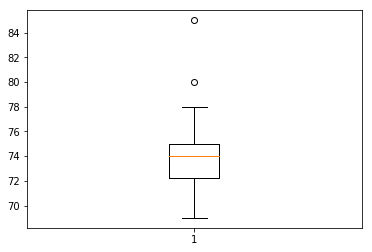

In [25]:
plt.boxplot(q3) # boxplot

In [28]:
acima = quantile[0.75] + 1.5*iq
for i in q3:
    if i > acima:
        print(i)

80
85


d) Sim, 2 clientes ganharam a garrafa de champagne, que são os outliers